# Beispiel 2: Virusausbreitung

In diesem Beispiel programmieren wir eine Simulation in Anlehnung an [diesen Artikel aus der Washinton Post](https://www.washingtonpost.com/graphics/2020/health/corona-simulator-german/). V.a. geht es darum, sich in einem zweidimensionalen Raum frei bewegende Agenten, deren Interaktion mit der Wand (Abprallen) und deren Interaktion untereinander (Ansteckung) zu modellieren. Zudem wird am Ende dieses Beispiels der Ansteckungsverlauf in der Simulation systematisch für verschiedene Parameter-Werte (Anzahl mobiler Agenten) analysiert.

Beginnen wir mit der Definition der Agenten-Klasse. Eine Instanz dieser Klasse befindet sich zu jedem Zeitpunkt an einer bestimmten Position, welche durch X- und Y-Koordinaten festgelegt ist. Die Position eines Agenten wird durch die beiden Attribute `x_position` und `y_position` ausgedrückt. Die Agenten bewegen sich in dem Raum, verändern also in jedem Zeitschritt ihre Position. Die Veränderung ihrer Position auf der X-Dimension und Y-Dimension entspricht den beiden Attributen `x_velocity` und `y_velocity`. Diese beiden Attribute geben über ihren Wert nicht nur die Geschwindigkeit, sondern auch die Richtung der Veränderung an. Negative Werte auf der X-Achse lassen den Agenten nach links und positive Werte lassen den Agenten nach rechts fahren. Negative Werte auf der Y-Achse lassen den Agenten nach oben (bzw. je nach Darstellungsart auch unten) und positive Werte lassen den Agenten nach unten (bzw. nach oben) fahren. Alle Attribute werden bei der Erstellung der Instanz als Input übergeben.

Damit die Agenten sich auch bewegen können, gebe ich der Klasse die Methode `move()`. Die Methode `move()` verändert die Position eines Agenten, indem sie die Attribute `x_velocity` und `y_velocity` auf die Atttribute `x_position` und `y_position` aufaddiert. Die Position verschiebt sich dann je nach Wert von `x_velocity` und `y_velocity` entsprechend.

In [1]:
class Agent:
    
    def __init__(self, x_position, y_position, x_velocity, y_velocity):
        
        # Position
        self.x_position = x_position
        self.y_position = y_position
        
        # Geschwindigkeit
        self.x_velocity = x_velocity
        self.y_velocity = y_velocity

    
    def move(self):
        # Position des Agenten um den Wert von x_velocity & y_velocity verändern
        self.x_position += self.x_velocity
        self.y_position += self.y_velocity

Unten wird eine Instanz der Klasse `Agent` erstellt, wobei ich für das Attribut `x_position` den Wert 50, für das Attribut `y_position` den Wert 50, für das Attribut `x_velocity` den Wert 1 und für das Attribut `y_velocity` den Wert 0 eingebe. Der Agent startet als auf der Position (50, 50) und bewegt sich mit einer Geschwindigkeit von 1 pro Aufruf der Methode `move()` nach rechts. Auf der Y-Achse verändert er mit einem Wert von 0 seine Position jedoch nicht.

In [2]:
agent = Agent(50, 50, 1, 0)

Prüfen wir, wo sich der Agent aktuell befindet, indem wir uns die beiden Positionsattribute anschauen:

In [3]:
agent.x_position, agent.y_position

(50, 50)

Im Folgenden lasse ich den Agenten für 100 Zeitschritte die Methode `move()` ausführen: 

In [4]:
# für jeden Zeitschritt
for tick in range(100):
    
    # Handlungen der Agenten
    agent.move()

Der Agent hat seine Position tatsächlich verändert, wie wir sehen, wenn wir uns nun die Positionsattribute des Agenten anschauen:

In [5]:
agent.x_position, agent.y_position

(150, 50)

Wie zu erwarten war, befindet sich der Agent nun auf einer Position 100 Schritte weiter rechts von seiner Startposition, da dieser auf dem Attribut `x_velocity` den Wert `1` und auf dem Attribut `y_velocity` den Wert `0` aufweist.

Im Folgenden mache ich die Bewegung des Agenten graphisch sichtbar, indem ich in jedem Zeitschritt die Position des Agenten mit einem Punkt auf einem Streudiagramm (ein Streudiagramm kann man mit der Matplotlib-Funktion/Methode `scatter()` erstellen) plotte, ein Foto davon mit Celluloid schieße und dann die Diagramme zu einer Animation zusammensetze.

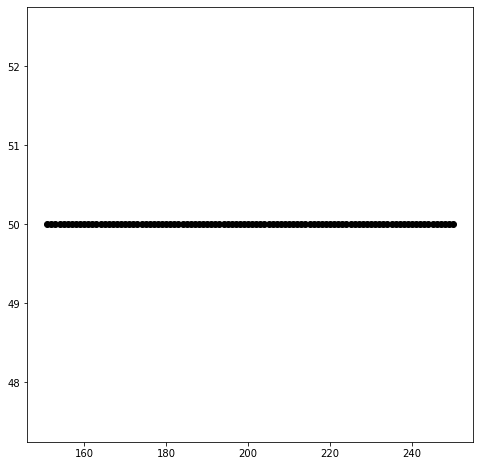

In [6]:
from matplotlib import pyplot as plt
import celluloid as cld

# Matplotlib-Diagramm initialisieren
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

# Celluloid-Kamera erstellen
camera = cld.Camera(fig)   

# für jeden Zeitschritt
for tick in range(100):
    
    # Agenten bewegen
    agent.move()
    
    # Position des Agenten mit Streudiagramm plotten
    ax.scatter(agent.x_position, agent.y_position, color = "black")
    
    # Foto von Diagramm schießen
    camera.snap()

# Endzustand von Diagramm anzeigen
plt.show()

# Animation erstellen
animation = camera.animate()

# Animation exportieren
animation.save("moving_dots.mp4", fps = 50)

In [7]:
from IPython.display import Video

Video("moving_dots.mp4", embed = True)

Das sieht ja schon mal nicht schlecht aus. Was man aber beim genaueren Hinschauen auf die Achsen bzw. Skalen sieht, ist dass ein ganz bestimmter Ausschnitt des "Raumes" im Diagramm dargestellt wird: Der Ausschnitt zeigt genau den Teil des Raumes, der vom Agent benötigt wird. In der Höhe braucht der Agent quasi keinen Raum, weshalb auch die Skala bzw. die Spannweite der anzeigten Y-Achse extrem klein ist. Auf der X-Achse hingegen weist die Skala eine höhere Spannweite auf, weil der Agent sich eben von links nach rechts bewegt und alle Positionen angezeigt werden. Der angezeigte Raum richtet sich also nach den Positionen des Agenten. Das kann sinnvoll sein, wenn man einen unbegrenzten Raum modellieren möchte, wir wollen jedoch klare Grenzen des Raumes festlegen.

Im nächsten Schritt lege ich daher mit den Variablen `X_MIN`, `X_MAX`, `Y_MIN` und `Y_MAX` die Größe des Raumes bzw. die Grenzen des Raumes fest. `X_MIN` ist die Position der unteren (bzw. linken) Raumgrenze auf der X-Achse, `X_MAX` ist die Position der oberen (bzw. rechte) Raumgrenze auf der X-Achse und so weiter. Diese Grenzen verwende ich unten um mit `ax.set(xlim=(X_MIN, X_MAX), ylim = (Y_MIN, Y_MAX))` die im Diagramm anzeigten Achsenabschnitte festzulegen:

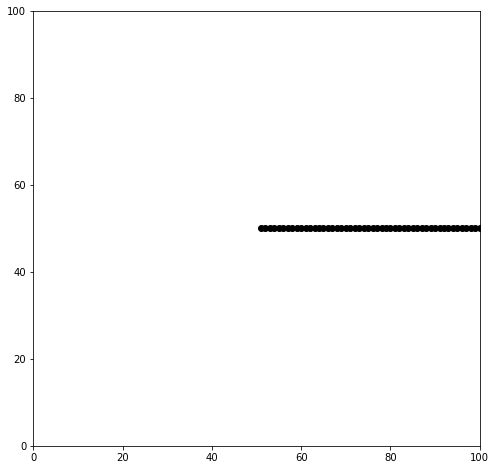

In [8]:
from matplotlib import pyplot as plt
import celluloid as cld

# Diagrammgrenzen bestimmen
X_MIN = 0
X_MAX = 100
Y_MIN = 0
Y_MAX = 100


# Matplotlib-Diagramm initialisieren
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
ax.set(xlim=(X_MIN, X_MAX), ylim = (Y_MIN, Y_MAX))

# Celluloid-Kamera erstellen
camera = cld.Camera(fig)   

# Agent erstellen
agent = Agent(50, 50, 1, 0)

# für jeden Zeitschritt
for tick in range(100):
    
    # Agent bewegen
    agent.move()
    
    # Position des Agenten plotten
    ax.scatter(agent.x_position, agent.y_position, color = "black")
    
    # Foto von Diagramm schießen
    camera.snap()

# Endzustand von Diagramm anzeigen
plt.show()

# Animation erstellen
animation = camera.animate()

# Animation exportieren
animation.save("moving_dots.mp4", fps = 50)

In [9]:
Video("moving_dots.mp4", embed = True)

Upps! Es wird zwar jetzt der gewünschte Raum angezeigt, das interessiert den Agenten aber herzlich wenig. Er kennt keine Grenzen und folgt weiter seiner Bestimmung: von der Position (50, 50) aus 100 Schritte nach rechts laufen. Ob er dabei im sichtbaren Bereich des Diagramms ist, ist ihm egal. Er weiß davon ja auch gar nichts.

Das geht so nicht weiter. Wir sollten den Agenten in seine Schranken weisen. Ich erweitere daher die Klasse `Agent` um die Methode `border_bounce()`. Diese Methode soll bewirken, dass ein Agent, sobald er die vorgegebenen Grenzen eines Raumes erreicht an dieser "abprallt", indem er die entsprechende Bewegungsrichtung wechselt.

```python
    
    def border_bounce(self, x_min, x_max, y_min, y_max):
        
        # wenn Untergrenze oder Obergrenze auf X-Achse überschritten wird
        if self.x_position <= x_min or self.x_position >= x_max:
            # Bewegungsrichtung auf X-Achse umkehren
            self.x_velocity *= -1
       
        # wenn Untergrenze oder Obergrenze auf Y-Achse überschritten wird
        if self.y_position <= y_min or self.y_position >= y_max:
            # Bewegungsrichtung auf Y-Achse umkehren
            self.y_velocity *= -1
```

Wie funktioniert die Methode `border_bounce()`? Über die Parameter werden die festgelegten Grenzen des Raumes von außen eingegeben. Innerhalb der Methode guckt der Agent nach, ob er sich gerade auf oder außerhalb einer Grenze befindet, ob also z.B. die `x_position` kleinergleich der X-Untergrenze `x_min` ist oder die `x_position` größergleich der X-Obergrenze `x_min`. Falls das so ist, dann kehrt er seine Bewegungsrichtung auf der entsprechenden Dimension um, indem die entsprechende Bewegung mit `-1` multipliziert wird.

Unten definiere ich die neue Klasse `Agent` mit der zusätzlichen Methode `border_bounce()`.

In [10]:
import random
from matplotlib import pyplot as plt
import celluloid as cld


class Agent:
    
    def __init__(self, x_position, y_position, x_velocity, y_velocity):
        
        # Position
        self.x_position = x_position
        self.y_position = y_position
        
        # Geschwindigkeit
        self.x_velocity = x_velocity
        self.y_velocity = y_velocity

    
    def move(self):
        # Position des Agenten um den Wert von x_velocity & y_velocity verändern
        self.x_position += self.x_velocity
        self.y_position += self.y_velocity
    
    
    def border_bounce(self, x_min, x_max, y_min, y_max):
        
        # wenn Untergrenze oder Obergrenze auf X-Achse überschritten wird
        if self.x_position <= x_min or self.x_position >= x_max:
            self.x_velocity *= -1
       
        # wenn Untergrenze oder Obergrenze auf Y-Achse überschritten wird
        if self.y_position <= y_min or self.y_position >= y_max:
            self.y_velocity *= -1
        
        

Nun führe ich die gesamte Simulation nocheinmal aus, wobei der Agent nun zusätzlich in jedem Zeitschritt die Methode `border_bounce()` ausführt und somit im Falle einer Grenzberührung seine Bewegungsrichtung entsprechend umkehrt.

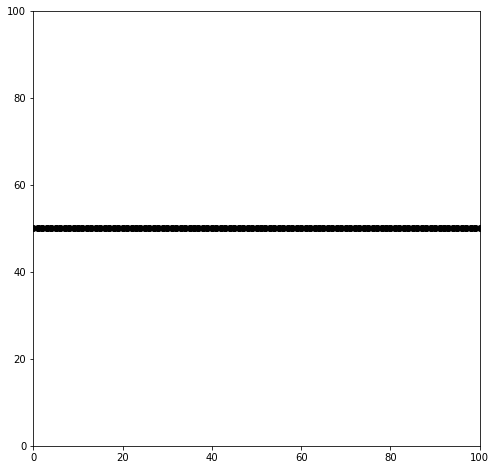

In [11]:
# Diagrammgrenzen bestimmen
X_MIN = 0
X_MAX = 100
Y_MIN = 0
Y_MAX = 100


# Matplotlib-Diagramm initialisieren
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
ax.set(xlim=[X_MIN, X_MAX], ylim = [Y_MIN, Y_MAX])

# Celluloid-Kamera erstellen
camera = cld.Camera(fig)   

# Agent erstellen
agent = Agent(50, 50, 1, 0)

# für jeden Zeitschritt
for tick in range(200):
    
    # Agent bewegen
    agent.move()
    agent.border_bounce(X_MIN, X_MAX, Y_MIN, Y_MAX)
    
    # Position des Agenten plotten
    ax.scatter(agent.x_position, agent.y_position, color = "black")
    
    # Foto von Diagramm schießen
    camera.snap()

# Endzustand von Diagramm anzeigen
plt.show()

# Animation erstellen
animation = camera.animate()

# Animation exportieren
animation.save("moving_dots.mp4", fps = 50)

In [12]:
Video("moving_dots.mp4", embed = True)

Sieht so aus als würde es funktionieren. Ich teste die Methode nocheinmal, indem ich den Agenten mit einer anderen Bewegungsrichtung initialisiere: `Agent(50, 50, -1, 0.3)`. Der so erstellte Agent läuft nun zu Beginn in jedem Zeitschritt mit einem Wert von `-1` eine 1 Einheit nach links und 0.3 Einheiten nach oben.

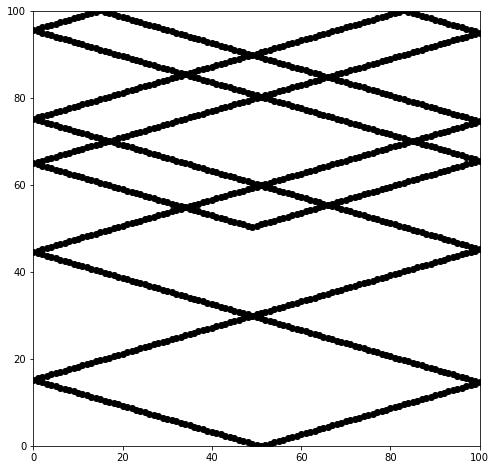

In [13]:
from matplotlib import pyplot as plt
import celluloid as cld

# Diagrammgrenzen bestimmen
X_MIN = 0
X_MAX = 100
Y_MIN = 0
Y_MAX = 100


# Matplotlib-Diagramm initialisieren
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
ax.set(xlim=[X_MIN, X_MAX], ylim = [Y_MIN, Y_MAX])

# Celluloid-Kamera erstellen
camera = cld.Camera(fig)   

# Agent erstellen
agent = Agent(50, 50, -1, 0.3)

# für jeden Zeitschritt
for tick in range(1000):
    
    # Agent bewegen
    agent.move()
    agent.border_bounce(X_MIN, X_MAX, Y_MIN, Y_MAX)
    
    # Position des Agenten plotten
    ax.scatter(agent.x_position, agent.y_position, color = "black")
    
    # Foto von Diagramm schießen
    camera.snap()

# Endzustand von Diagramm anzeigen
plt.show()

# Animation erstellen
animation = camera.animate()

# Animation exportieren
animation.save("moving_dots.mp4", fps = 50)

In [14]:
Video("moving_dots.mp4", embed = True)

Der Vorteil an Klassen ist ja, dass man unkompliziert viele Instanzen dieser Klasse erstellen kann und dann alle Instanzen handeln lassen kann. Im Folgenden führe ich dieselbe Simulation daher nochmal, diesmal aber mit 100 Instanzen, aus.  Dabei gebe ich bei der Erstellung der Agenten jeweils zufällige Startpositionen im Bereich zwischen `X_MIN` und `X_MAX` sowie zwischen `Y_MIN` und `Y_MAX` ein. Ebenfalls gebe ich zufällige Bewegungengeschwindigkeiten jeweils zwischen -1 und 1 ein. Desweiteren muss nun in jedem Zeitschritt die gesamte Population durchgegangen werden, sodass jeder Agent der Population handelt. Außerdem ändert sich das Plotten ein bisschen. Theoretisch hätten wir weiterhin die Position eines Agenten direkt mit `ax.scatter(agent.x_position, agent.y_position, color = "black")` plotten können, so wie es oben gemacht wurde. Bei vielen Agenten erhöht das einzelne Einzeichnen eines einzelnen Agenten die Rechenzeit jedoch extrem. Daher werden in jeder Runde in den Listen `x_data` und `y_data` die aktuellen Positionen der Agenten gesammelt, um diese dann am Ende jeder Runde mit `ax.scatter(x_data, y_data, color = "black")` gemeinsam auf einmal einzuzeichnen.

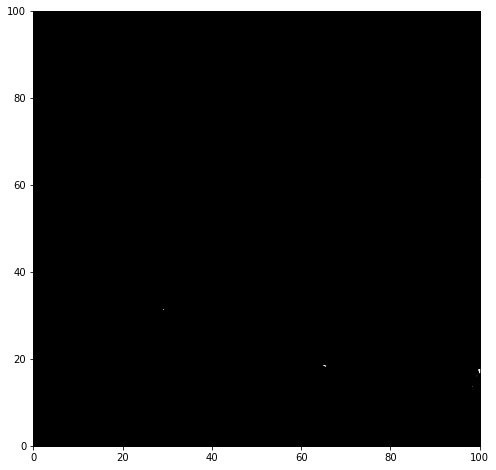

In [15]:
# Diagrammgrenzen bestimmen
X_MIN = 0
X_MAX = 100
Y_MIN = 0
Y_MAX = 100

# Matplotlib-Diagramm initialisieren
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
ax.set(xlim=[X_MIN, X_MAX], ylim = [Y_MIN, Y_MAX])

# Celluloid-Kamera erstellen
camera = cld.Camera(fig)      

# Population erstellen
population = []
for i in range(100):
    x_position = random.uniform(X_MIN, X_MAX)
    y_position = random.uniform(Y_MIN, Y_MAX)
    x_velocity = random.uniform(-1, 1)
    y_velocity = random.uniform(-1, 1)
    
    agent = Agent(x_position, y_position, x_velocity, y_velocity)
    
    population.append(agent)

    
# für jeden Zeitschritt
for tick in range(1000):
    
    # leere Datencontainer erstellen, welche die X- und Y-Position der Kugeln sammeln
    x_data = []
    y_data = []
    
    # für jeden Agenten in Population
    for agent in population:
        
        # Handlungen der Agenten
        agent.move()
        agent.border_bounce(X_MIN, X_MAX, Y_MIN, Y_MAX)
        
        # X- und Y-Position in Datenliste ablegen
        x_data.append(agent.x_position)
        y_data.append(agent.y_position)
    
    # Datenlisten d.h. Agenten an ihrer Position mit Streudiagramm plotten
    ax.scatter(x_data, y_data, color = "black")
    
    # Foto von Diagramm schießen
    camera.snap()

# Endzustand von Diagramm anzeigen
plt.show()

# Animation erstellen
animation = camera.animate()

# Animation exportieren
animation.save("moving_dots.mp4", fps = 50)

In [16]:
Video("moving_dots.mp4", embed = True, width = 500)

Diese Animation macht inhaltlich noch wenig Sinn, zeigt jedoch meiner Meinung nach schon gut, wofür objektorientierte Programmierung gut ist und wie wir mit dieser ABM extrem intuitiv und komfortabel umsetzen können. Im Folgenden bauen wir noch ein wenig Interaktion zwischen den Agenten ein, wodurch diese Simulation zu einer kleinen Virusausbreitungssimulation in grober Anlehnung an [diese Corona-Simulation aus der Washington Post](https://www.washingtonpost.com/graphics/2020/health/corona-simulator-german/) wird.

Ich erweitere die Agenten zunächst um das Attribut `infection`, welches den Infektionsstatus der Agenten mit den Ausprägungen `"susceptible"` und `"infected"` beschreibt. Zunächst haben alle Agenten den Status `"susceptible"`. An Methoden erweitere ich den Agenten zusätzlich um zwei Methoden namens `infect_others()` und `compute_euclidean_distance()`. Die Methode `infect_others()` bewirkt, dass infizierte Agenten andere Agenten in der Nähe anstecken. Die Methode `compute_euclidean_distance()` ist eine Hilfs-Methode, welche die Distanz zwischen dem Agenten und einem anderen Agenten misst.

In der Methode `infect_others()` überprüft der Agent zunächst, ob dieser selbst infiziert ist. Nur wenn das so ist, geht es weiter, weil ja nur dann der Agent auch einen anderen Agenten anstecken kann. Der Agent geht dann jeden Agenten der Liste `population` durch und überprüft, ob dieser noch ansteckbar ist, da nur ansteckbare Agenten noch angesteckt werden können. Zugleich filtert der Agent dabei auch sich selbst heraus, da dieser ja auf jeden Fall bereits angesteckt ist. Zu den noch ansteckbaren Agenten berechnet der Agent dann den Abstand mithilfe der Methode `compute_euclidean_distance()`. Ist der Abstand kleinergleich dem Wert 1, steckt der Agent den anderen Agenten an, indem beim ansteckbaren Agenten der Infektionsstatus auf `"infected"` gesetzt wird.

```python
    def infect_others(self, population):
        
        # Wenn man infiziert ist
        if self.infection == "infected":
            
            # Für jeden Agenten in Population
            for agent in population:
                
                # Wenn dieser Agent infizierbar ist
                if agent.infection == "susceptible":
                    
                    # Distanz berechnen
                    euclidean_distance = self.compute_euclidean_distance(agent)
                    
                    # Wenn Distanz kleinergleich 1
                    if euclidean_distance <= 1:
                        
                        # Agenten infizeren
                        agent.infection = "infected"
        
```

In der Methode `compute_euclidean_distance()` berechnet der Agent den sogenannten euklidischen Abstand zu einem per Parameter eingegeben Agenten. Dazu berechnet der Agent die quadrierte Differenz zwischen seiner Position und der Position des eingegebenen Agenten jeweils einzeln auf der X- und auf der Y-Dimension, addiert diese beiden quadrierten Differenzen und zieht die Wurzel.                       
   
```python
    def compute_euclidean_distance(self, other_agent):
        # Quadrierte Distanz auf X-Dimension messen
        squared_x_distance = pow(other_agent.x_position - self.x_position, 2)
        
        # Quadrierte Distanz auf Y-Dimension messen
        squared_y_distance = pow(other_agent.y_position - self.y_position, 2)
        
        # Quadrierte Distanzen summieren und Quadratwurzel ziehen
        euclidean_distance = math.sqrt(squared_x_distance + squared_y_distance)
        
        # Euklidische Distanz ausgeben
        return euclidean_distance
               
```

Vereinfacht gesprochen ist die euklidische Distanz letztlich nichts anderes als die Distanz auf der X-Achse plus die Distanz auf der Y-Achse. Die Distanzen werden jedoch zunächst quadriert, um negative Distanzen auszuschließen und nach dem Addieren schließlich wieder "entquadriert".

Unten definiere ich die Agenten-Klasse mit den zwei neuen Methoden und dem neuen Attribut `infection`.

In [17]:
import random
from matplotlib import pyplot as plt
import celluloid as cld
import math


class Agent:
    
    def __init__(self, x_position, y_position, x_velocity, y_velocity):
        
        # Position
        self.x_position = x_position
        self.y_position = y_position
        
        # Geschwindigkeit
        self.x_velocity = x_velocity
        self.y_velocity = y_velocity
        
        #Infektionsstatus
        self.infection = "susceptible"

    
    def move(self):
        # Position des Agenten um den Wert von x_velocity & y_velocity verändern
        self.x_position += self.x_velocity
        self.y_position += self.y_velocity
    
    
    def border_bounce(self, x_min, x_max, y_min, y_max):
        
        # wenn Untergrenze oder Obergrenze auf X-Achse überschritten wird
        if self.x_position <= x_min or self.x_position >= x_max:
            self.x_velocity *= -1
       
        # wenn Untergrenze oder Obergrenze auf Y-Achse überschritten wird
        if self.y_position <= y_min or self.y_position >= y_max:
            self.y_velocity *= -1
    
    
    def infect_others(self, population):
        
        # Wenn man infiziert ist
        if self.infection == "infected":
            
            # Für jeden Agenten in Population
            for agent in population:
                
                # Wenn dieser Agent infizierbar ist
                if agent.infection == "susceptible":
                    
                    # Distanz berechnen
                    euclidean_distance = self.compute_euclidean_distance(agent)
                    
                    # Wenn Distanz kleinergleich 1
                    if euclidean_distance <= 1:
                        
                        # Agenten infizeren
                        agent.infection = "infected"
                        

    
    def compute_euclidean_distance(self, other_agent):
        # Quadrierte Distanz auf X-Dimension messen
        squared_x_distance = pow(other_agent.x_position - self.x_position, 2)
        
        # Quadrierte Distanz auf Y-Dimension messen
        squared_y_distance = pow(other_agent.y_position - self.y_position, 2)
        
        # Quadrierte Distanzen summieren und Quadratwurzel ziehen
        euclidean_distance = math.sqrt(squared_x_distance + squared_y_distance)
        
        # Euklidische Distanz ausgeben
        return euclidean_distance

Im Ablauf der Simulation ändert sich nun Folgendes: 

Zum einen muss es zu Beginn der Simulation mindestens einen infizierten Agenten geben, damit überhaupt eine Infektionskette in Gang gebracht werden kann. Dazu wird nach der Erstellung der Population der Infektionsstatus eines zufällig gezogenen Agenten auf `"infected"` gesetzt. Das ist nun unser Patient 0.

Zum anderen sollen nun infizierte und nicht infizierte Agenten in unterschiedlichen Farben geplottet werden. Daher sammele ich die X- und Y-Positionen von infizierten und nicht infizierten Personen in jeweils getrennten Listen und plotte die Datenreihen der Infizierten und die Datenreihen der Nicht-Infizierten getrennt voneinander in unterschiedlichen Farben.

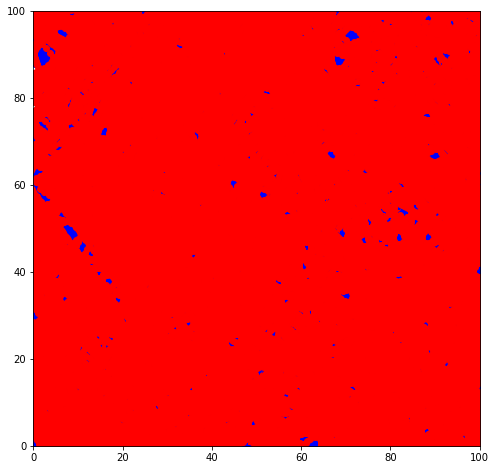

In [18]:
# Diagrammgrenzen bestimmen
X_MIN = 0
X_MAX = 100
Y_MIN = 0
Y_MAX = 100

# Matplotlib-Diagramm initialisieren
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
ax.set(xlim=[X_MIN, X_MAX], ylim = [Y_MIN, Y_MAX])

# Celluloid-Kamera erstellen
camera = cld.Camera(fig)      

# Population erstellen
population = []
for i in range(100):
    x_position = random.uniform(X_MIN, X_MAX)
    y_position = random.uniform(Y_MIN, Y_MAX)
    x_velocity = random.uniform(-1, 1)
    y_velocity = random.uniform(-1, 1)
    agent = Agent(x_position, y_position, x_velocity, y_velocity)
    population.append(agent)

# Einen Agenten der Population infizieren
patient_zero = random.choice(population)
patient_zero.infection = "infected"

# Für jeden Zeitschritt
for tick in range(1000):
    
    # Datenliste für Positionen der noch nicht infizierten Agenten
    x_data_susceptible = []
    y_data_susceptible = []
    
    # Datenliste für Positionen der infizierten Agenten
    x_data_infected = []
    y_data_infected = []
    
    # Für jeden Agenten in Population
    for agent in population:
        
        # Handlungen der Agenten
        agent.infect_others(population)
        agent.move()
        agent.border_bounce(X_MIN, X_MAX, Y_MIN, Y_MAX)
        
        # Position des Agenten, je nach Infektionsstatus, in Datenliste ablegen
        if agent.infection == "susceptible":
            x_data_susceptible.append(agent.x_position)
            y_data_susceptible.append(agent.y_position)
            
        elif agent.infection == "infected":
            x_data_infected.append(agent.x_position)
            y_data_infected.append(agent.y_position)
    
    # Positionen der nicht-infizierten Agenten in blau plotten
    ax.scatter(x_data_susceptible, y_data_susceptible, color = "blue")
    
    # Positionen der infizierten Agenten in rot plotten
    ax.scatter(x_data_infected, y_data_infected, color = "red")
    
    # Foto schießen
    camera.snap()

# Endzustand des Diagramms anzeigen
plt.show()

# Animation erstellen und ausgeben
animation = camera.animate()
animation.save("moving_dots.mp4", fps = 30)

In [19]:
Video("moving_dots.mp4", embed = True, width = 500)

Interessant. Nach kurzer Zeit hat ist ausgehend von einer einzigen Infektion die gesamte Population infiziert.

Nun wollen wir den Effekt von *social distancing* auf das Infektionsgeschehen untersuchen. Im [Artikel der Washington Post](https://www.washingtonpost.com/graphics/2020/health/corona-simulator-german/) wird *social distancing* einfach darüber modelliert, dass ein gewisser Anteil der Agenten sich nicht mehr bewegt und "zu Hause" bleibt. Auch hier soll *social distancing* im Folgenden durch das Stillstehen eines Teils der Bevölkerung modelliert werden. Um stillstehende Agenten zu erstellen, müssen wir einfach die Bewegungsgeschwindigkeit auf X- und Y-Achse auf 0 setzen. Unten lasse ich daher die Simulation nochmal laufen, erstelle nun aber 50 Agenten, die sich wie oben mit einer zufälligen Geschwindigkeit und Richtung bewegen und dann noch 50 Agenten, die eine Geschwindigekit von 0 auf beiden Dimensionen aufweisen. Um die Simulationen vergleichbarer zu machen, wird der zu Beginn infizierte Agent immer aus der Gruppe der sich bewegenden Agenten gezogen.

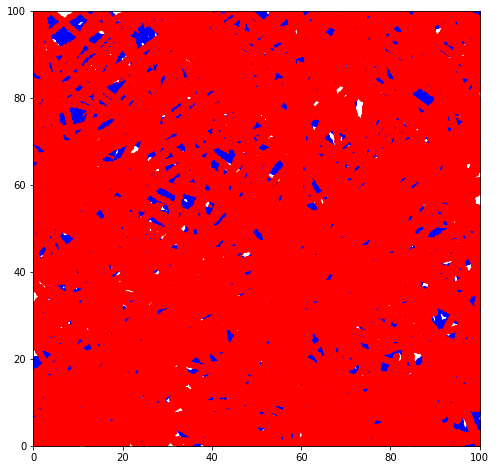

In [20]:
# Diagrammgrenzen bestimmen
X_MIN = 0
X_MAX = 100
Y_MIN = 0
Y_MAX = 100

# Matplotlib-Diagramm initialisieren
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
ax.set(xlim=[X_MIN, X_MAX], ylim = [Y_MIN, Y_MAX])

# Celluloid-Kamera erstellen
camera = cld.Camera(fig)      

# Population erstellen
population = []

# sich bewegende Agenten hinzufügen
for i in range(50):
    x_position = random.uniform(X_MIN, X_MAX)
    y_position = random.uniform(Y_MIN, Y_MAX)
    x_velocity = random.uniform(-1, 1)
    y_velocity = random.uniform(-1, 1)
    agent = Agent(x_position, y_position, x_velocity, y_velocity)
    population.append(agent)

# Einen Agenten der Population infizieren
patient_zero = random.choice(population)
patient_zero.infection = "infected"

# sich nicht bewegende Agenten hinzufügen
for i in range(50):
    x_position = random.uniform(X_MIN, X_MAX)
    y_position = random.uniform(Y_MIN, Y_MAX)
    x_velocity = 0
    y_velocity = 0
    agent = Agent(x_position, y_position, x_velocity, y_velocity)
    population.append(agent)

    


# Für jeden Zeitschritt
for tick in range(1000):
    
    # Datenliste für Positionen der noch nicht infizierten Agenten
    x_data_susceptible = []
    y_data_susceptible = []
    
    # Datenliste für Positionen der infizierten Agenten
    x_data_infected = []
    y_data_infected = []
    
    # Für jeden Agenten in Population
    for agent in population:
        
        # Handlungen der Agenten
        agent.infect_others(population)
        agent.move()
        agent.border_bounce(X_MIN, X_MAX, Y_MIN, Y_MAX)
        
        # Position des Agenten, je nach Infektionsstatus, in Datenliste ablegen
        if agent.infection == "susceptible":
            x_data_susceptible.append(agent.x_position)
            y_data_susceptible.append(agent.y_position)
            
        elif agent.infection == "infected":
            x_data_infected.append(agent.x_position)
            y_data_infected.append(agent.y_position)
    
    # Positionen der nicht-infizierten Agenten in blau plotten
    ax.scatter(x_data_susceptible, y_data_susceptible, color = "blue")
    
    # Positionen der infizierten Agenten in rot plotten
    ax.scatter(x_data_infected, y_data_infected, color = "red")
    
    # Foto schießen
    camera.snap()

# Endzustand des Diagramms anzeigen
plt.show()

# Animation erstellen und ausgeben
animation = camera.animate()
animation.save("moving_dots.mp4", fps = 30)

In [21]:
Video("moving_dots.mp4", embed = True, width = 500)

Wenn man die beiden Videos vergleicht, kann man sich durchaus einbilden, dass der Virus sich unter Bedingung von *social distancing* langsamer ausbreitet als ohne Einschränkung. Wie man den Effekt des *social distancing* innerhalb dieser Simulation systamatisch auswerten könnte, wird im folgenden Exkurs behandelt.

## Simulationsexperiment

Um den Effekt des *social distancing* zu evaluieren, ist das Anschauen der obigen Animationen ein erster Schritt. Eine wirklich systematische Analyse ist damit jedoch nicht möglich. Eine Möglichkeit, für eine systematische Analyse wäre, den Infektionsverlauf für mehrere Szenarien per Liniendiagramm nachzeichnen und zu vergleichen. Dafür müssen wir im Folgenden mehrere Durchläufe der Simulation mit unterschiedlicher Anzahl von mobilen Agenten durchführen und die Infektionszahlen pro Zeitschritt zwischen den Simulationen vergleichen.

Damit der mehrfache Aufruf der Simulation etwas komfortabler wird, verpacke ich den Simulationsablauf unten in eine Funktion, welche die Anzahl bzw. den Anteil an sich bewegenden Agenten als Input erwartet, die Simulation mit den entsprechenden Einstellungen ablaufen lässt und schließlich den Infektionsverlauf der simulierten Virusausbreitung als Datenreihe ausgibt. 

Um den Infektionsverlauf zu messen, wird zunächst zu Beginn der Simulation das dictionary `data_dict` erstellt. Dieses enthält zwei Listen, in welche in jedem Zeitschritt die Nummer des aktuellen Zeitschritts eingespeichert wird sowie die Anzahl der infizierten Agenten. Die Anzahl der infizierten Agenten wird während der Simulation mit der Variable `n_infected` gezählt. An Ende der Simulation wird aus dem Dictionary `data_dict` ein Pandas-Dataframe spaltenweise erstellt. Danach werden zum Dataframe noch ein paar Spalten mit relevanten Modellinformationen angehängt. Zudem wird nun bei der Simulation auf jegliche graphische Animation verzichtet, was nicht nur den Code deutlich schlanker macht, sondern auch die Rechenzeit pro Simulation deutlich verkürzt.

In [22]:
import pandas as pd

def infection_sim(n_moving_agents, population_size = 100, time = 2000):
    
    # Dictionary, welches Listen zur Sammlung von Daten während Simulation enthält
    data_dict = {
        "tick": [],
        "infections": [],
    }
    
    ######### INITIALISIERUNG #########
    
    # Raumgrenzen bestimmen
    X_MIN = 0
    X_MAX = 100
    Y_MIN = 0
    Y_MAX = 100   

    # Population erstellen
    population = []

    # sich bewegende Agenten hinzufügen
    for i in range(n_moving_agents):
        x_position = random.uniform(X_MIN, X_MAX)
        y_position = random.uniform(Y_MIN, Y_MAX)
        x_velocity = random.uniform(-1, 1)
        y_velocity = random.uniform(-1, 1)
        agent = Agent(x_position, y_position, x_velocity, y_velocity)
        population.append(agent)
    
    # Einen Agenten der (mobilen) Population infizieren
    patient_zero = random.choice(population)
    patient_zero.infection = "infected"

    # sich nicht bewegende Agenten hinzufügen
    n_not_moving_agents = population_size - n_moving_agents
    for i in range(n_not_moving_agents):
        x_position = random.uniform(X_MIN, X_MAX)
        y_position = random.uniform(Y_MIN, Y_MAX)
        x_velocity = 0
        y_velocity = 0
        agent = Agent(x_position, y_position, x_velocity, y_velocity)
        population.append(agent)

    
    ######### SIMULATIONSLOOP #########
    
    # Für jeden Zeitschritt
    for tick in range(time):
        
        # Zählvariable für Infektionen pro Zeitschritt
        n_infected = 0
        
        # Für jeden Agenten in Population
        for agent in population:

            # Handlungen der Agenten
            agent.infect_others(population)
            agent.move()
            agent.border_bounce(X_MIN, X_MAX, Y_MIN, Y_MAX)
            
            # Wenn Agent infiziert ist, Infektionszähler um 1 erhöhen
            if agent.infection == "infected":
                n_infected += 1
        
        # Infektionszahl dieser Runde an Datenspeicher anhängen
        data_dict["tick"].append(tick)
        data_dict["infections"].append(n_infected)
    
    
    ######### Dataframe erstellen & ausgeben #########
    
    # Dataframe aus dem Daten-Dictionary machen
    df = pd.DataFrame(data_dict)
    
    # Neue Spalte mit der Anzahl der sich bewegenden Agenten hinzufügen
    df["n_moving_agents"] = n_moving_agents
    
    # Neue Spalte mit der Populationsgröße hinzufügen
    df["population_size"] = population_size
    
    # Neue Spalte mit der Anzahl der Zeitschritte hinzufügen
    df["time"] = time
    
    # Ausgabe des Dataframes
    return df

Zunächst lasse ich die Simulation einmal laufen und speichere den erstellten Dataframe in der Variable `df`:

In [23]:
df = infection_sim(n_moving_agents=30)

Wir haben nun einen Dataframe, welcher für jeden Zeitschritt die entsprechenden Infektionsdaten sowie allgemeine Modellinformationen enthält:

In [24]:
df

tick  infections  n_moving_agents  population_size  time
0        0           1               30              100  2000
1        1           1               30              100  2000
2        2           1               30              100  2000
3        3           1               30              100  2000
4        4           1               30              100  2000
...    ...         ...              ...              ...   ...
1995  1995         100               30              100  2000
1996  1996         100               30              100  2000
1997  1997         100               30              100  2000
1998  1998         100               30              100  2000
1999  1999         100               30              100  2000

[2000 rows x 5 columns]

Im Folgenden führe ich die Simulation für verschiedene Werte des Parameters `n_moving_agents` durch, um die Effektivität des *social distancing* zu prüfen. In der Liste `list_of_n_moving_agents` sind die verschiedenen Parameterwerte, welche dann mittels For-Loop durchgegangen werden. Für jeden Wert wird das Simulationsmodell einmal laufen gelassen und der jeweils ausgegebene Dataframe wird in der Liste `list_of_dataframes` gespeichert.

In [25]:
# Liste der konkreten Parameter-Werte für Anzahl mobiler Agenten
list_of_n_moving_agents = [80, 50, 20]

# Liste, um die ausgegebenen Datenreihen aller Simulationen zu sammeln
list_of_dataframes = []

# für jeden Parameterwert / jede Anzahl mobiler Agenten
for n in list_of_n_moving_agents:
    
    # Anzahl mobiler Agenten in Funktion einsetzen, Simulation laufen lassen und Output-Daten speichern
    df = infection_sim(n)
    
    # Output-Daten an Sammel-Liste anhängen
    list_of_dataframes.append(df)

In der Liste `list_of_dataframes` liegen nun alle Dataframes der durchgeführten Simulationen vor. Wir können aus dieser Liste von Dataframes tatsächlich sehr einfach einen großen Dataframe mache. Dafür hat das Paket Pandas die Funktion `pd.concat()`. Diese erwartet eine Liste von Dataframes mit derselben Struktur (d.h. v.a. mit denselben Spaltenbezeichnungen) und setzt diese zu einem großen Dataframe zusammen. Unten überführe ich die Liste von Dataframes `list_of_dataframes` in den Gesamt-Datensatz namens `df_experiment`.

In [26]:
df_experiment = pd.concat(list_of_dataframes)

Da alle Daten nun in einem einzigen Dataframe vorliegen, kann man diese mithilfe von Seaborn sehr entspannt in einem Liniendiagramm anzeigen lassen:

<AxesSubplot:xlabel='tick', ylabel='infections'>

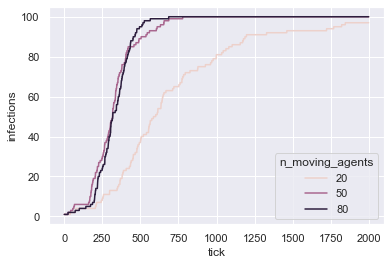

In [27]:
import seaborn as sns
sns.set_theme()

sns.lineplot(
    data=df_experiment, # Dataframe, in welchem die Daten sind
    x="tick", # X-Variable: Zeitschritt/Zeitpunkt
    y="infections", # Y-Variable: Anzahl der infizierten Agenten
    hue="n_moving_agents", # Z-Variable/Experimenteller Stimulus: Anzahl der mobilen Agenten
)

Interessant! Wir sehen auf jeden Fall die Tendenz hin zu einem Trend: Je weniger Mobilität der Agenten, desto langsamer verbreitet sich das Virus in der Population. 

Allerdings ist der Trend nicht ganz eindeutig. Die Aussagekraft dieses Vergleichs wird auch dadurch eingeschränkt, dass der konkrete Verlauf eines Simulationsduchgangs von starken Zufallsschwankungen abhängig ist. Um unsere Ergbnisse besser abzusichern, Zufallsschwankungen zu eliminieren und eventuelle Trends besser herauszustellen, sollten wir daher mehrere Durchgänge pro bestimmter Anzahl mobiler Agenten durchführen und dann durchschnittliche Infektionsverläufe pro Kondition vergleichen.

In [28]:
# Liste der Parameterwerte
list_of_n_moving_agents = [80, 50, 20]

# Anzahl der Durchläufe pro Parameterwert
n_replications = 20

# Liste, um die ausgegebenen Datenreihen aller Simulationen zu sammeln
list_of_dataframes = []

# für jeden Parameterwert / jede Anzahl mobiler Agenten
for n in list_of_n_moving_agents:
    
    for rep in range(n_replications):
        # Anzahl mobiler Agenten in Funktion einsetzen, Simulation laufen lassen und Output-Daten speichern
        df = infection_sim(n)

        # Output-Daten an Sammel-Liste anhängen
        list_of_dataframes.append(df)

<AxesSubplot:xlabel='tick', ylabel='infections'>

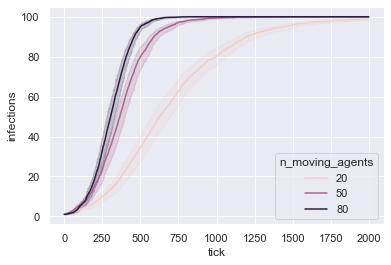

In [29]:
df_total = pd.concat(list_of_dataframes)
sns.lineplot(data=df_total, x="tick", y="infections", hue="n_moving_agents")